<a href="https://colab.research.google.com/github/PathaAkash/AIML-2025/blob/main/AIMI_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)


In [ ]:
x.shape

(300, 2)

In [ ]:
y_true.shape

(300,)

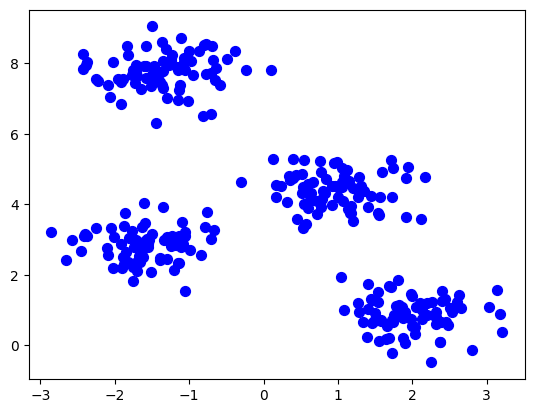

In [ ]:
plt.scatter(x[:,0], x[:,1], s=50,
            color='blue')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(x)

KMeans(n_clusters=4)

In [ ]:
y_means_pred = kmeans.predict(x)

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[ 1.99469693,  0.8727049 ],
       [-1.35241261,  7.76731726],
       [ 0.95415778,  4.39985544],
       [-1.57480456,  2.84532424]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_Kmeans_pred, y_true)

NameError: name 'y_Kmeans_pred' is not defined

In [ ]:
def find_clusters(x, n_clusters, rseed=2):
  rng = np.random.RandomState(rseed)
  i = rng.permutation(x.shape[0])[:n_clusters]
  centers = x[i]
  while True:
    labels = pairwise_distances_argmin(x, centers)
    new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers, labels

In [ ]:
centers, labels = find_clusters(x, 4)
plt.scatter(x[:, 0], x[:, 1], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)

NameError: name 'pairwise_distances_argmin' is not defined

In [ ]:
centers, labels = find_clusters(x, 8)
plt.scatter(x[:, 0], x[:, 1], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)

NameError: name 'pairwise_distances_argmin' is not defined

In [ ]:
from sklearn.datasets import make_moons
x, y = make_moons(200, noise=.03, random_state=0)

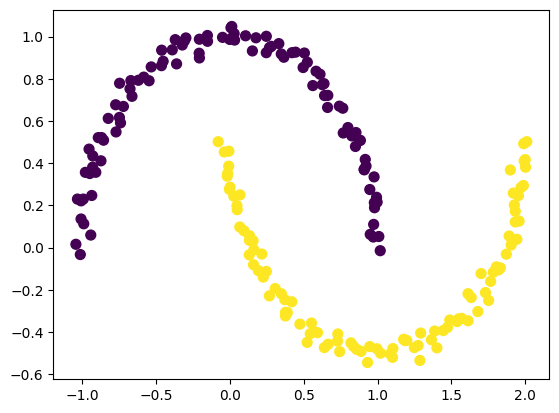

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis')

In [ ]:
model = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors', assign_labels='kmeans')

NameError: name 'SpectralClustering' is not defined

In [ ]:
labels = model.fit_predict(x)

NameError: name 'model' is not defined

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
from sklearn.datasets import make_blobs
x, y_ture = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [ ]:
def plot_kmeans(kmeans, x, n_clusters=4, rseed=0, ax=None):
  labels = kmeans.fit_predict(x)
  ax = ax or plt.gca()
  ax.axis('equal')
  ax.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
  centers = kmeans.cluster_centers_
  radii = [cdist(x[labels == i], [center]).max() for i, center in enumerate(centers)]
  for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))